# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('../files/emp_automovel.csv')

In [6]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [7]:
x = dados.drop('inadimplente', axis =1)
y = dados['inadimplente']

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [10]:
print(f'Acurácia: {modelo.score(x,y)}')

Acurácia: 1.0


### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

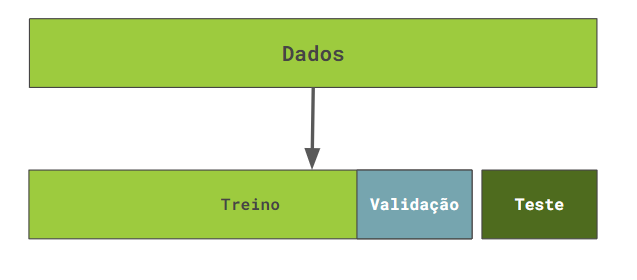

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [13]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8494904625032663


In [14]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205865272938444
Acurácia de validação: 0.9060186394913335


### Avaliando o modelo

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10361   118]
 [  961    41]]


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

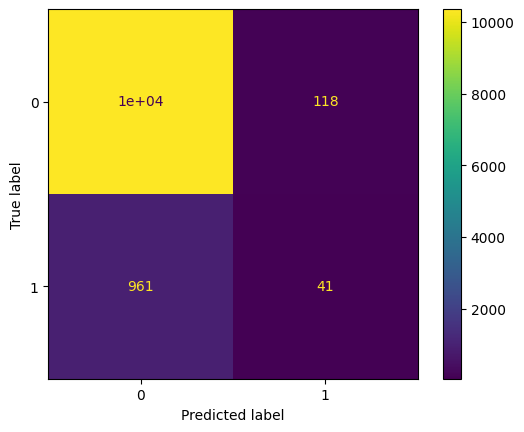

In [18]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

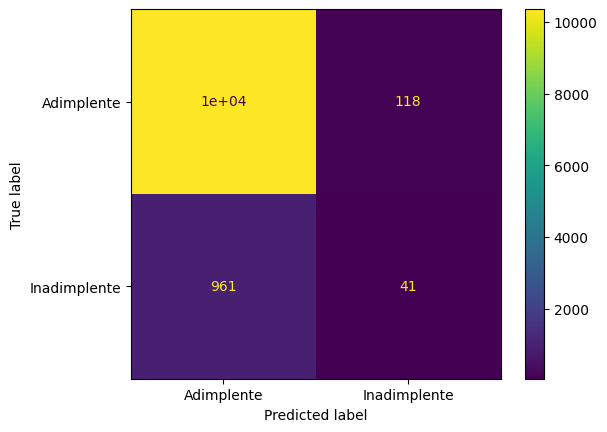

In [19]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

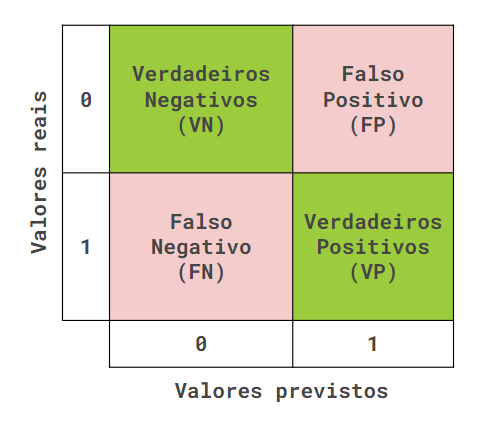

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9060186394913335


In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Revocação: {recall_score(y_val, y_previsto)}')

Precisão: 0.2578616352201258
Revocação: 0.04091816367265469


In [24]:
from sklearn.metrics import f1_score

In [25]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.07062876830318691


### Curva ROC

In [26]:
from sklearn.metrics import RocCurveDisplay

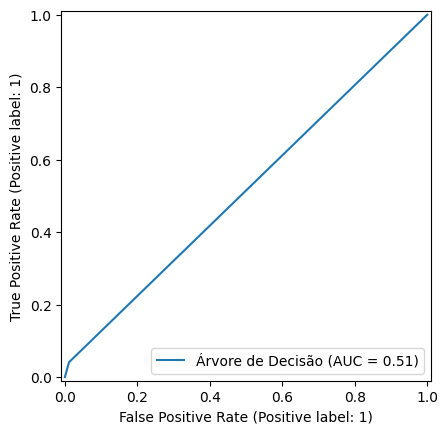

In [27]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5148287736008087


### Curva de precisão x recall

In [30]:
from sklearn.metrics import PrecisionRecallDisplay

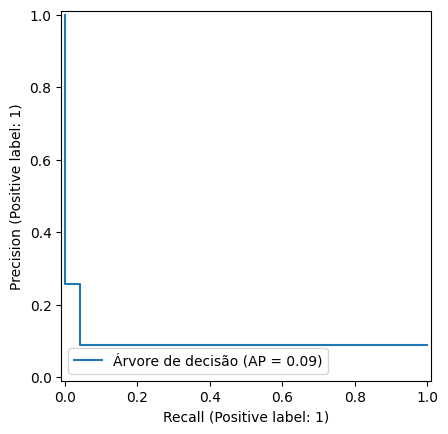

In [31]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [32]:
from sklearn.metrics import average_precision_score

In [33]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.0942547347420352


### Relatório de métricas

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [36]:
from sklearn.model_selection import cross_validate, KFold

In [37]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [38]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.13745904, 0.1168859 , 0.11769176, 0.11729383, 0.1161592 ]),
 'score_time': array([0.00331378, 0.00145626, 0.00186014, 0.00181794, 0.0013876 ]),
 'test_score': array([0.91268372, 0.90712108, 0.90744774, 0.91310976, 0.89917247])}

In [39]:
cv_resultados['test_score']

array([0.91268372, 0.90712108, 0.90744774, 0.91310976, 0.89917247])

In [40]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8978270212525593, 0.9179868862507744]


In [41]:
def intervalo_conf():
    media = cv_resultados['test_score'].mean()
    desvio_padrao = cv_resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [42]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [43]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.13898206, 0.12182593, 0.11829591, 0.11575508, 0.11642885]),
 'score_time': array([0.00617909, 0.00363183, 0.00293398, 0.00316215, 0.002985  ]),
 'test_score': array([0.02906209, 0.0210396 , 0.0196802 , 0.01697128, 0.02312139])}

In [44]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.013840081303794143, 0.030109740538298162]


In [45]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.13210988, 0.11890411, 0.11627603, 0.11524296, 0.11669302]),
 'score_time': array([0.01071405, 0.00681806, 0.00644779, 0.00606108, 0.00890183]),
 'test_accuracy': array([0.91257485, 0.90810105, 0.90722997, 0.91310976, 0.89982578]),
 'test_recall': array([0.02642008, 0.01732673, 0.0196802 , 0.0156658 , 0.02543353]),
 'test_precision': array([0.23255814, 0.21875   , 0.22535211, 0.21428571, 0.22222222]),
 'test_f1': array([0.04744958, 0.03211009, 0.0361991 , 0.02919708, 0.04564315])}

In [46]:
def relatorio_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_padrao = resultados[metrica].std()
        print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

In [47]:
relatorio_metricas(cv_resultados)

Intervalo de confiança(test_accuracy): [0.898605090610634, 0.917731469718186]
Intervalo de confiança(test_recall): [0.012294712619062573, 0.029515819817609965]
Intervalo de confiança(test_precision): [0.21027805365634175, 0.23498922183120882]
Intervalo de confiança(test_f1): [0.02361279971011859, 0.05262680245020873]


In [48]:
dados['inadimplente'].value_counts(normalize = True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [49]:
from sklearn.model_selection import StratifiedKFold

In [50]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')

In [51]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.02162699720109075, 0.03574455519133642]


In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [54]:
y_balanceado.value_counts(normalize = True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [61]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])

In [62]:
relatorio_metricas(cv_resultados)

Intervalo de confiança(test_accuracy): [0.7706326922960423, 0.7867734717512542]
Intervalo de confiança(test_recall): [0.712531777377845, 0.7446169391065538]
Intervalo de confiança(test_precision): [0.7881563748574952, 0.8318469855076461]
Intervalo de confiança(test_f1): [0.7610219444064467, 0.7730377636607743]


In [63]:
from imblearn.pipeline import Pipeline as imbpipeline

In [64]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [65]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [66]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.22399624451714617, 0.3183059276429654]


In [67]:
from imblearn.under_sampling import NearMiss, 

In [68]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

In [69]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [70]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6212374223369002, 0.6997727862240943]


In [71]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [72]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

In [82]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



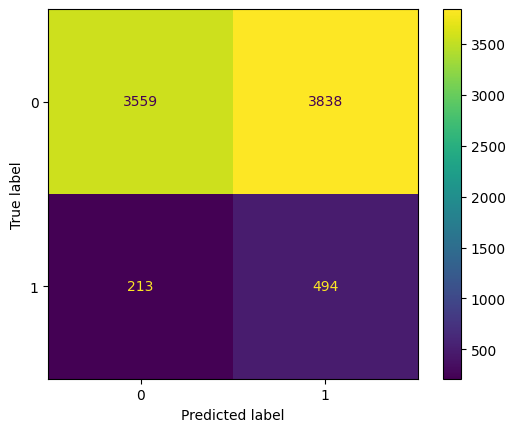

In [75]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto)

In [77]:
from imblearn.combine import SMOTEENN


In [78]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('combine', SMOTEENN()), ('arvore', modelo)])

In [79]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [80]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.2646233362135877, 0.4213508668555186]


              precision    recall  f1-score   support

           0       0.92      0.77      0.84      7397
           1       0.11      0.30      0.16       707

    accuracy                           0.73      8104
   macro avg       0.52      0.54      0.50      8104
weighted avg       0.85      0.73      0.78      8104



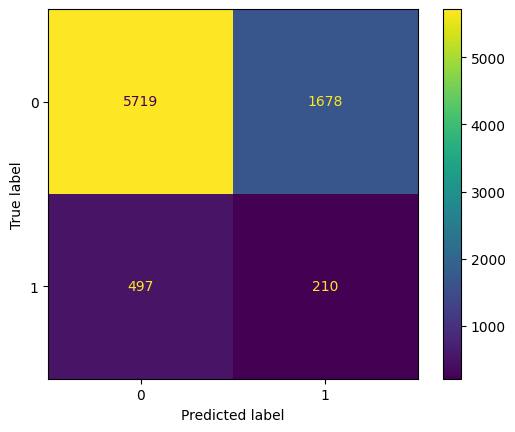

In [83]:
undersample = SMOTEENN()
x_balanceado, y_balanceado = undersample.fit_resample(x, y)
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)
print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto)